## ARIMA simple example
[Link](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

/tmp/ipykernel_1983/3971170788.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -196.177
Date:                Mon, 16 May 2022   AIC                            406.354
Time:                        14:18:39   BIC                            417.242
Sample:                    01-31-1901   HQIC                           410.113
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3179      0.305     -1.042      0.297      -0.916       0.280
ar.L2          0.2995      0.316      0.948      0.343      -0.320       0.919
ar.L3          0.2214      0.217      1.021      0.3

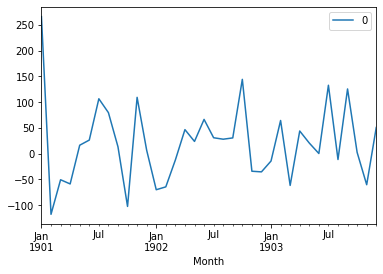

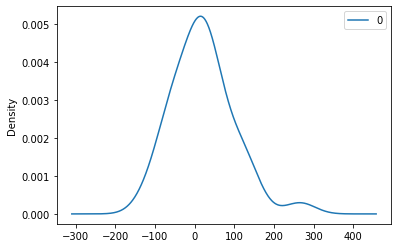

                0
count   36.000000
mean    20.682172
std     77.296824
min   -117.674354
25%    -34.361880
50%     18.553874
75%     54.240548
max    266.000000


In [39]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [42]:
series.head()

Month
1901-01    266.0
1901-02    145.9
1901-03    183.1
1901-04    119.3
1901-05    180.3
Freq: M, Name: Sales, dtype: float64

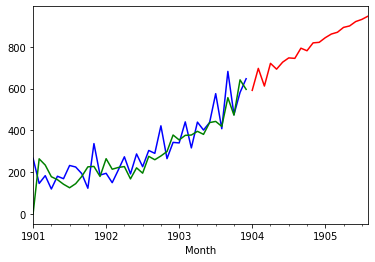

In [40]:
fc = model_fit.forecast(20)
pr = model_fit.predict()
series.plot(color='b')
fc.plot(color='r')
pr.plot(color='g')

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


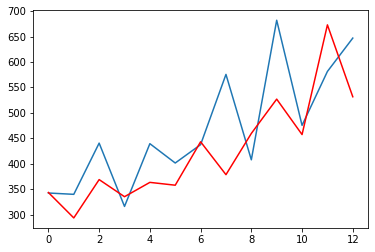

In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [38]:
series.index

PeriodIndex(['1901-01', '1901-02', '1901-03', '1901-04', '1901-05', '1901-06',
             '1901-07', '1901-08', '1901-09', '1901-10', '1901-11', '1901-12',
             '1902-01', '1902-02', '1902-03', '1902-04', '1902-05', '1902-06',
             '1902-07', '1902-08', '1902-09', '1902-10', '1902-11', '1902-12',
             '1903-01', '1903-02', '1903-03', '1903-04', '1903-05', '1903-06',
             '1903-07', '1903-08', '1903-09', '1903-10', '1903-11', '1903-12'],
            dtype='period[M]', name='Month')